In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

%matplotlib inline

In [2]:
# Data reading

data = pd.read_csv('fire.csv')

data.sample(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
928449,-30.86104,151.02866,319.8,0.50,0.41,2020-01-06,1436,N,VIIRS,n,1.0NRT,281.4,2.8,N
384187,-15.07487,145.01611,350.2,0.46,0.47,2019-11-27,418,N,VIIRS,n,1.0NRT,300.0,8.2,D
622674,-19.85007,121.95561,352.0,0.52,0.41,2019-12-19,542,N,VIIRS,n,1.0NRT,314.5,35.5,D
374502,-36.55878,147.17279,350.1,0.40,0.60,2019-11-25,448,N,VIIRS,n,1.0NRT,293.6,4.6,D
33679,-29.31734,152.42635,320.8,0.43,0.46,2019-10-08,1424,N,VIIRS,n,1.0NRT,290.3,2.9,N
599888,-13.44543,135.43999,341.7,0.39,0.37,2019-12-18,424,N,VIIRS,n,1.0NRT,308.9,13.1,D
68644,-11.23043,142.35335,347.0,0.40,0.37,2019-10-16,406,N,VIIRS,n,1.0NRT,309.0,4.4,D
558222,-32.63147,150.28735,341.6,0.40,0.37,2019-12-15,1454,N,VIIRS,n,1.0NRT,294.0,4.4,N
94695,-13.21821,134.35425,353.8,0.40,0.45,2019-10-21,412,N,VIIRS,n,1.0NRT,320.3,7.3,D
711103,-15.85720,142.94823,338.1,0.50,0.49,2019-12-26,330,N,VIIRS,n,1.0NRT,297.0,7.7,D


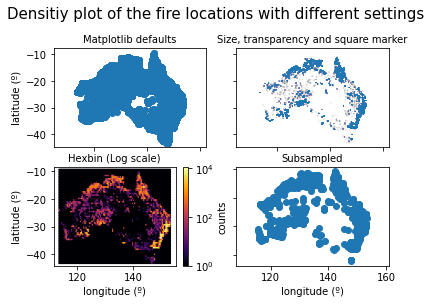

In [3]:
fig, ax = plt.subplots(2, 2)

fig.suptitle('Densitiy plot of the fire locations with different settings', fontsize=15, y=1.025)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

# Matplotlib defaults
ax[0, 0].scatter(data['longitude'], data['latitude'])
ax[0, 0].set_title('Matplotlib defaults', fontsize=10)

# Size, transparency and square marker
size = data['scan'] * data['track'] # One could also add a scale factor here
ax[0, 1].scatter(data['longitude'], data['latitude'], alpha=.005, s=size, marker='s')
ax[0, 1].set_title('Size, transparency and square marker', fontsize=10)

# Hexbin
hb = ax[1, 0].hexbin(data['longitude'], data['latitude'], gridsize=100, bins='log', cmap='inferno')
fig.colorbar(hb, ax=ax[1, 0]).set_label('counts')
ax[1, 0].set_title('Hexbin (Log scale)', fontsize=10)

# Subsampled
n_samples = len(data.index)
samples = np.random.choice(n_samples, int(n_samples/500))
ax[1, 1].scatter(data.loc[samples, 'longitude'], data.loc[samples, 'latitude'])
ax[1, 1].set_title('Subsampled', fontsize=10)

plt.show()

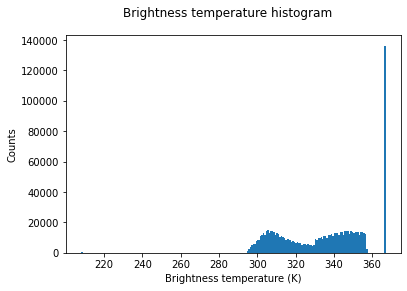

In [4]:
fig, ax = plt.subplots()

fig.suptitle('Brightness temperature histogram')

ax.hist(data['bright_ti4'], bins='auto')
ax.set_xlabel('Brightness temperature (K)')
ax.set_ylabel('Counts')

plt.show()

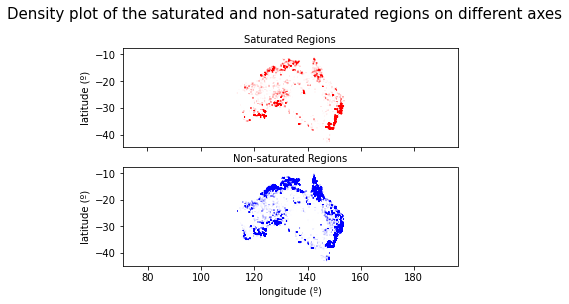

In [5]:
fig, ax = plt.subplots(2)

fig.suptitle('Density plot of the saturated and non-saturated regions on different axes', fontsize=15, y=1.025)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

size = data['scan'] * data['track'] # One could also add a scale factor here
saturated_values = data['bright_ti4'] == max(data['bright_ti4'])

ax[0].scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=size.loc[saturated_values], marker='s', color='r')
ax[1].scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=size.loc[~saturated_values], marker='s', color='b')

ax[0].set_title('Saturated Regions', fontsize=10)
ax[1].set_title('Non-saturated Regions', fontsize=10)

plt.show()

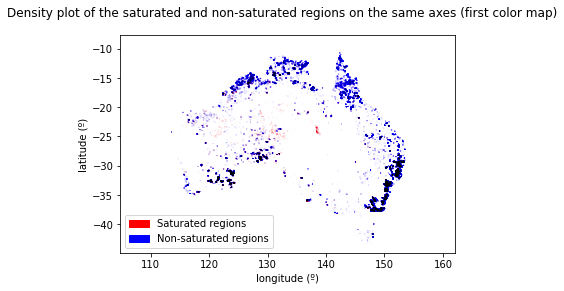

In [6]:
fig, ax = plt.subplots()

fig.suptitle('Density plot of the saturated and non-saturated regions on the same axes (first color map)')

ax.axis('equal')
ax.set_xlabel('longitude (º)')
ax.set_ylabel('latitude (º)')

ax.scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=size.loc[saturated_values], marker='s', color='r')
ax.scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=size.loc[~saturated_values], marker='s', color='b')

sat_legend = ptc.Patch(color='r', label='Saturated regions')
non_sat_legend = ptc.Patch(color='b', label='Non-saturated regions')
ax.legend(handles=[sat_legend, non_sat_legend])

plt.show()

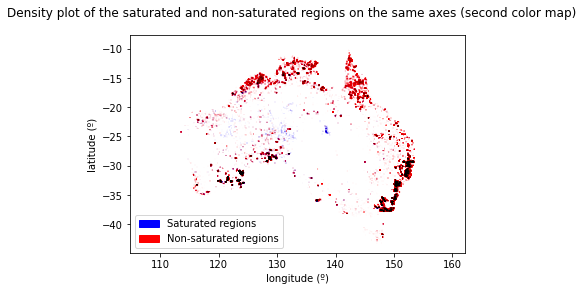

In [8]:
fig, ax = plt.subplots()

fig.suptitle('Density plot of the saturated and non-saturated regions on the same axes (second color map)')

ax.axis('equal')
ax.set_xlabel('longitude (º)')
ax.set_ylabel('latitude (º)')

ax.scatter(data.loc[~saturated_values, 'longitude'], data.loc[~saturated_values, 'latitude'], alpha=.005, s=size.loc[~saturated_values], marker='s', color='r')
ax.scatter(data.loc[saturated_values, 'longitude'], data.loc[saturated_values, 'latitude'], alpha=.005, s=size.loc[saturated_values], marker='s', color='b')

sat_legend = ptc.Patch(color='b', label='Saturated regions')
non_sat_legend = ptc.Patch(color='r', label='Non-saturated regions')
ax.legend(handles=[sat_legend, non_sat_legend])

plt.show()